In [1]:
#Zadanie 1

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml


samochody = fetch_openml('cars1')

In [2]:
samochody.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [9]:
print(samochody.feature_names)

X = samochody.data[:,[3,5]]
#5 - czas od 0 do 60MPH
#3 - Moc KM

# Konwersja typów dla y

y = samochody['target']
y = [int(elem) for elem in y]

#Podział na zbiór uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#Tworzenie klasyfikatora z 3 klastrami
kmn = KMeans(n_clusters=3)
#nauka klasyfikatora danych treningowych
kmn.fit(X_train)

['MPG', 'cylinders', 'cubicInches', 'horsepower', 'weightLbs', 'time-to-sixty', 'year']


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

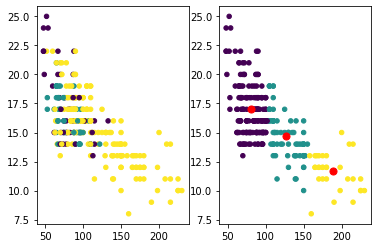

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

centra = kmn.cluster_centers_

fig, ax = plt.subplots(1, 2)
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)

y_pred_train = kmn.predict(X_train)

ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=20)

ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

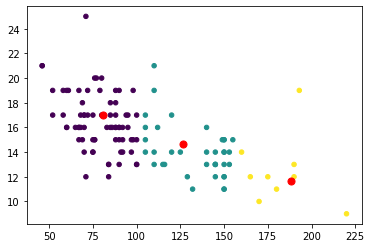

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

y_pred = kmn.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20)

plt.scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

In [ ]:
#Zadanie 2

#Na podstawie wykresów jestesmy w stanie stwierdzić, że w zbiorze znajdują się samochody z różnych klas, o różnych mocach silnika i różnej masie.
#Klasy zaczynają się od kombi/sedan, przez SUVy a kończąć na samochodach ciężarowych.
#samochody różnych klas, o podobnej masie mają różnej mozy silniki co przekłada się na którszy lub dłuższy czas przyspieszenia do 60mph.